In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1]:
fn = [
    'results/results.json',
    'results/results_deterministic.json',
    'results/results_graph.json',
    'results/results_small_eps.json',
    ]

In [110]:
fn = [
    'results_semisparse_64.json',
    'results_semisparse_256.json',
    'results_semisparse_1024.json',
    ]

In [114]:
fn = [
    'results_dense_128_128_1.json',
    'results_dense_128_256_1.json',
    'results_dense_256_128_1.json',
    'results_dense_256_256_1.json',
    'results_dense_128_128_2.json',
    'results_dense_128_256_2.json',
    'results_dense_256_128_2.json',
    'results_dense_256_256_2.json',
]

In [4]:
data_dic = {}
for f in fn:
    with open(f, 'r') as f:
        fn_json = json.load(f)
        data_dic.update({f.name.split('.')[0]:fn_json})



In [5]:
plt.rcParams["figure.figsize"] = (13,7)
markers = ['o','+','*','s','d','v','>','h']

In [6]:
def extract_mean_round_num_from_group(group_res):
    round_count = {'cpu':[],'gpu':[]}
    for iters_res in group_res:
        for iter in iters_res['iteration_res']:
            round_count[iter['device']].append(iter['auction_rounds'])
    res = {'cpu':{'mean':0,'sd':0}, 'gpu':{'mean':0,'sd':0},}

    for dev in ['cpu', 'gpu']:
        try:
            mean = sum(round_count[dev])/len(round_count[dev])
            aux = [(el-mean)**2 for el in round_count[dev]]
            sd = (sum(aux)/(len(aux)-1))**(0.5)
        except Exception as e:
            mean = 0
            sd = 0
        res[dev]['mean'] = mean
        res[dev]['sd'] = sd

    return res


In [69]:
for case,data in data_dic.items():
    directories = [el['directory'] for el in  data]
    for i in range(len(directories)): # dense and sparse
        #print(data[i]['directory_results'])
        for file_res in data[i]['directory_results']:
            out = file_res['group_values']['partitioned_output']['group_results']
            out = extract_mean_round_num_from_group(out)
        break
    break
out

{'cpu': {'mean': 0, 'sd': 0},
 'gpu': {'mean': 18204.333333333332, 'sd': 2789.416761021319}}

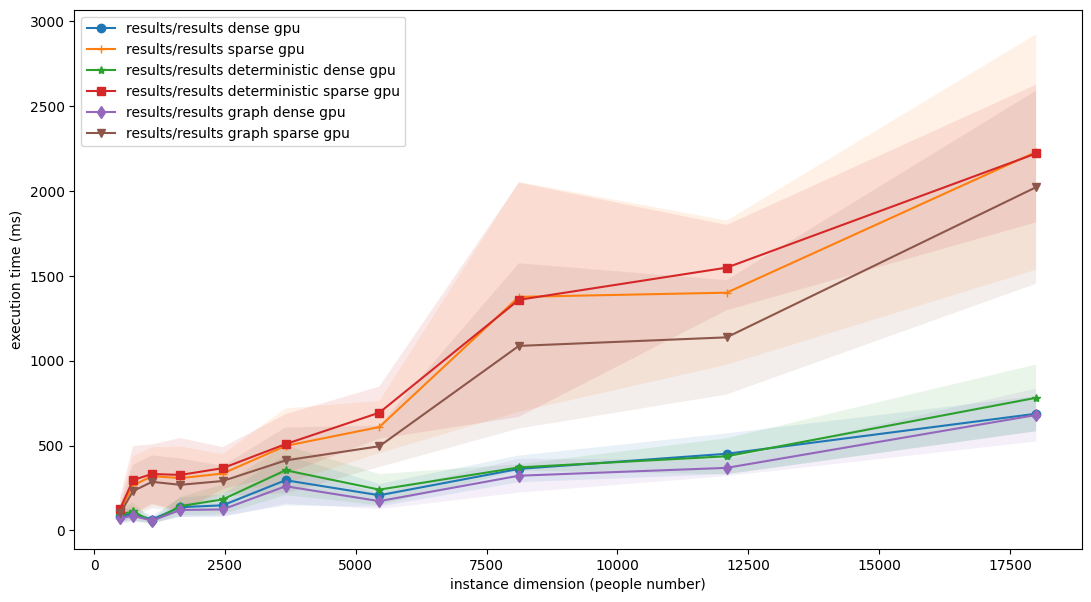

In [7]:
## semisparse

def filter_tiemout(el, arglist):
    if not (el['group_values']['output'].startswith('timeout')):
        output = el
        for arg in arglist:
            output = output[arg]
            
        return output
    return None

j=0
plt.figure()

results = pd.DataFrame()

for case,data in data_dic.items():
    if case.endswith('eps') or case.endswith('num') :
        continue
    directories = [el['directory'] for el in  data]
    for i in range(len(directories)): # dense and sparse
        #print(data[i]['directory_results'][-1])

        round_number = [extract_mean_round_num_from_group(out['group_values']['partitioned_output']['group_results'])['gpu'] for out in  data[i]['directory_results']]
        obj_number = [el['obj_number'] for el in data[i]['directory_results']]
        gpu_mean_times = np.array( list(filter(None, [filter_tiemout(el,['group_values','times','gpu_time_mean']) for el in data[i]['directory_results']])))
        gpu_sd_times = np.array( list(filter(None, [filter_tiemout(el,['group_values','times','gpu_time_sd']) for el in data[i]['directory_results']])))
        person_number = [el['person_number'] for el in data[i]['directory_results']][:len(gpu_mean_times)]
        plt.plot(person_number, gpu_mean_times, '-'+markers[j], label=' '.join(case.split('_')[-3:]) + ' ' +directories[i].split('/')[1] + ' gpu')
        plt.fill_between(person_number,gpu_mean_times-gpu_sd_times,gpu_mean_times+gpu_sd_times,alpha=.1)
        plt.legend(loc="upper left")
        plt.xlabel("instance dimension (people number)")
        plt.ylabel("execution time (ms)")
        j+=1
        results[case+'_mean_exec_time'] = gpu_mean_times
        results[case+'_sd_exec_time'] = gpu_sd_times
        results[case+'_mean_round_num'] = [el['mean'] for el in round_number]
        results[case+'_sd_round_num'] =  [el['sd'] for el in round_number]
    results.index = person_number



In [1]:
results

NameError: name 'results' is not defined

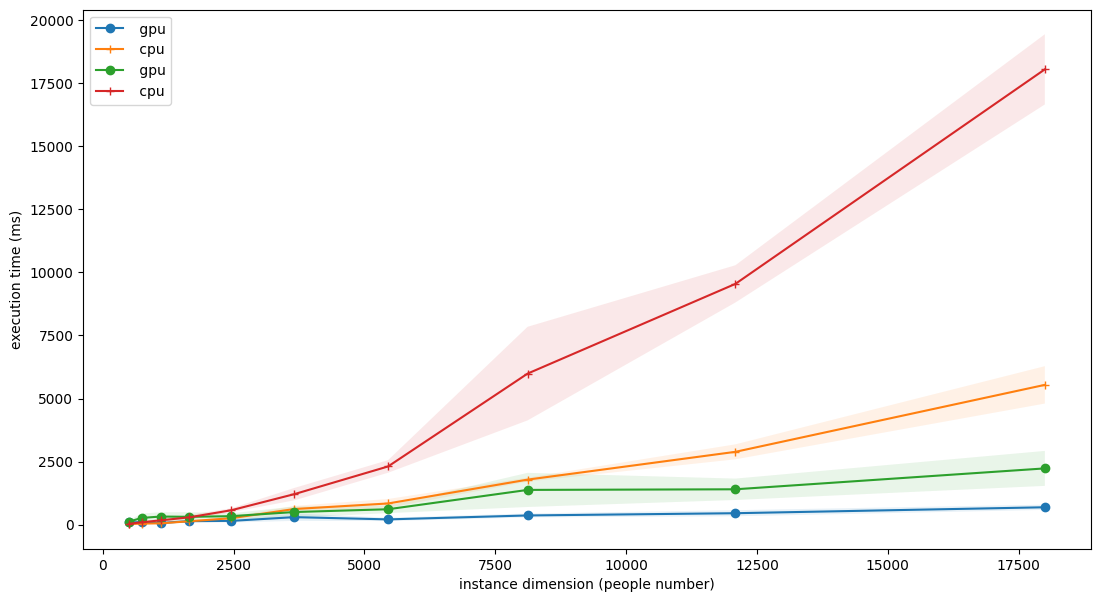

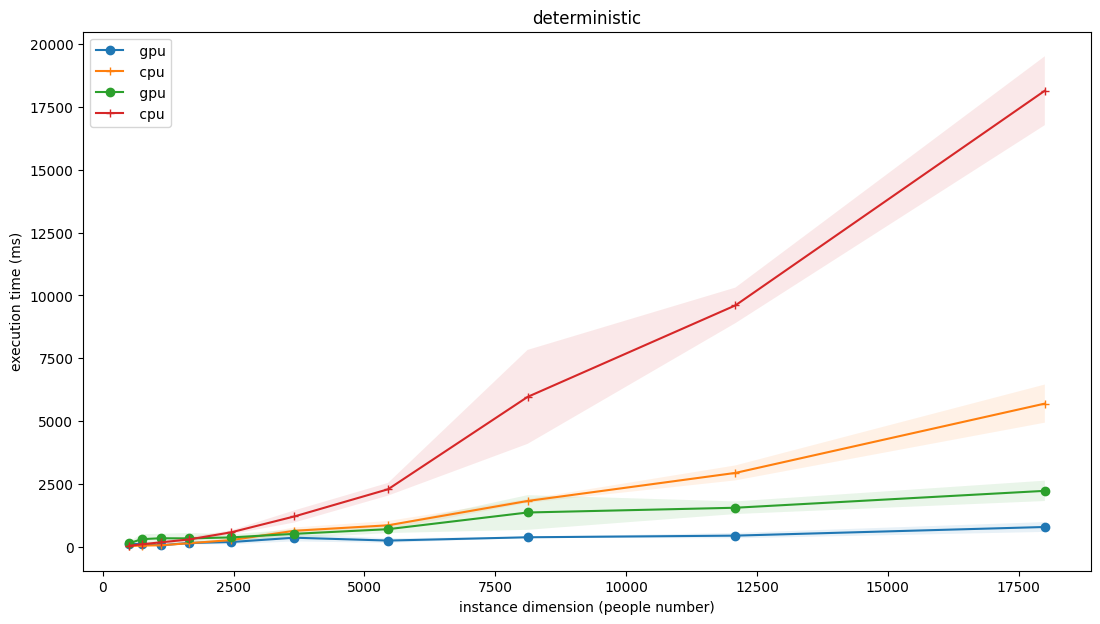

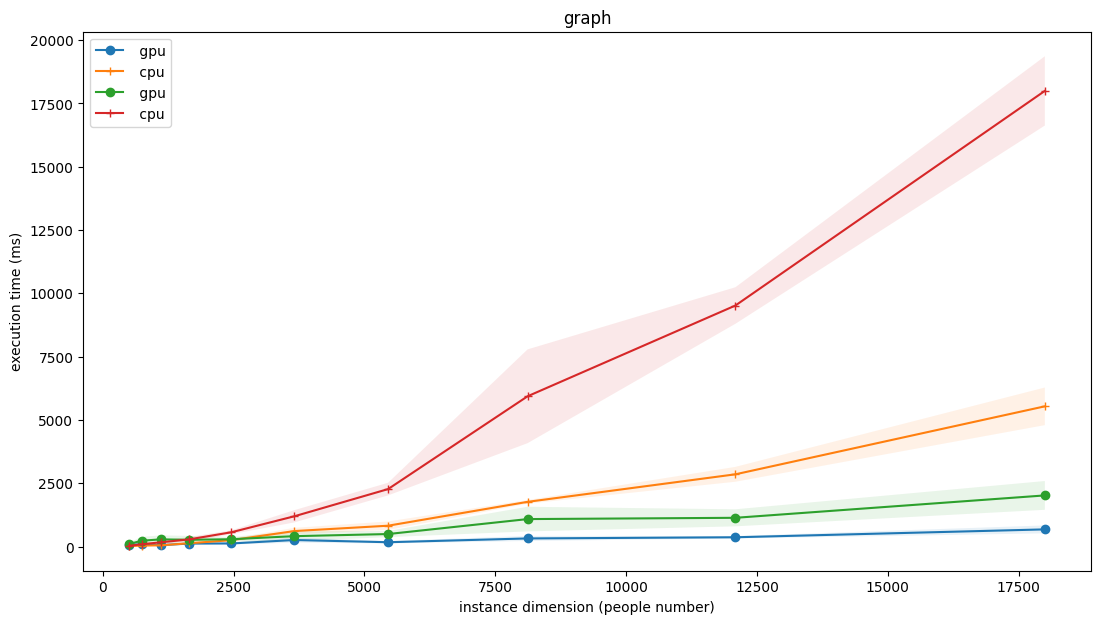

In [25]:
filter_fn = ['results/results',
    'results/results_deterministic',
    'results/results_graph']
filter_fn = ['results/results',
    'results/results_deterministic',
    'results/results_graph']
total_res = []
for case,data in data_dic.items():
    #print(case)
    if case in filter_fn:
        directories = [el['directory'] for el in  data]
        plt.figure()
        plt.title(' '.join(case.split('/')[-1].split('_')[1:]))
        result_list = []
        for i in range(len(directories)): # dense and sparse
            results = pd.DataFrame()
            j = 0
            round_number = [extract_mean_round_num_from_group(out['group_values']['partitioned_output']['group_results'])['gpu'] for out in  data[i]['directory_results']]
            cpu_round_number = [extract_mean_round_num_from_group(out['group_values']['partitioned_output']['group_results'])['cpu'] for out in  data[i]['directory_results']]
            person_number = [el['person_number'] for el in data[i]['directory_results']]
            obj_number = [el['obj_number'] for el in data[i]['directory_results']]
            gpu_mean_times = np.array( [el['group_values']['times']['gpu_time_mean'] for el in data[i]['directory_results']])
            gpu_sd_times = np.array( [el['group_values']['times']['gpu_time_sd'] for el in data[i]['directory_results']])
            cpu_mean_times = np.array( [el['group_values']['times']['cpu_time_mean'] for el in data[i]['directory_results']])
            cpu_sd_times = np.array( [el['group_values']['times']['cpu_time_sd'] for el in data[i]['directory_results']])
            plt.plot(person_number, gpu_mean_times, '-'+markers[j], label=directories[i].split('/')[-1]+ ' gpu')
            plt.fill_between(person_number,gpu_mean_times-gpu_sd_times,gpu_mean_times+gpu_sd_times,alpha=.1)
            j +=1
            plt.plot(person_number, cpu_mean_times, '-'+markers[j], label=directories[i].split('/')[-1] + ' cpu')
            plt.fill_between(person_number,cpu_mean_times-cpu_sd_times,cpu_mean_times+cpu_sd_times,alpha=.1)
            plt.legend(loc="upper left")
            plt.xlabel("instance dimension (people number)")
            plt.ylabel("execution time (ms)")
            
            results[case+'_gpu_mean_exec_time'] = gpu_mean_times
            results[case+'_gpu_sd_exec_time'] = gpu_sd_times
            results[case+'_mean_round_num'] = [el['mean'] for el in round_number]
            results[case+'_sd_round_num'] =  [el['sd'] for el in round_number]
            #if i == 0:
            results[case+'_cpu_mean_exec_time'] = cpu_mean_times
            results[case+'_cpu_sd_exec_time'] = cpu_sd_times
            results[case+'_cpu_mean_round_num'] = [el['mean'] for el in cpu_round_number]
            results[case+'_cpu_sd_round_num'] =  [el['sd'] for el in cpu_round_number]
            results.index = person_number
            result_list.append(results)
        total_res.append(result_list)
    

In [25]:
mean = total_res[0][0]['results/results_deterministic_gpu_mean_exec_time'].apply(lambda x: "{:.2f}".format(x))
sd = total_res[0][0]['results/results_deterministic_gpu_sd_exec_time'].apply(lambda x: " ({:.2f})".format(x))
mean+sd
#result_small_eps_list[0]

500        92.94 (42.71)
744       112.45 (50.99)
1108       52.81 (15.88)
1650      143.84 (54.01)
2458      182.95 (87.58)
3660     354.84 (146.66)
5451      240.65 (91.84)
8117      371.49 (18.88)
12087    437.07 (106.00)
18000    781.46 (196.09)
dtype: object

In [34]:
case_names = ['dense ', 'sparse ']
exec_names = ['', 'det. ', 'graph ']

out = pd.DataFrame()
for i,exec in enumerate(total_res):
    for j,case in enumerate(exec):
        case_prefix = exec_names[i] + case_names[j]
        colnames = ['gpu_mean', 'gpu_sd', "gpu_round_num_mean", "gpu_round_num_sd",'cpu_mean', 'cpu_sd', "cpu_round_num_mean", "cpu_round_num_sd"]
        aux = pd.DataFrame(case)
        aux.columns = colnames
        
        #mean = aux['gpu_mean'].apply(lambda x: "{:.2f}".format(x))
        #sd = aux['gpu_sd'].apply(lambda x: " ({:.2f})".format(x))
        #out[case_prefix + 'gpu exec time (ms)'] = mean+sd

        mean = aux['gpu_round_num_mean'].apply(lambda x: "{:.2f}".format(x))
        sd = aux['gpu_round_num_sd'].apply(lambda x: " ({:.2f})".format(x))
        out[case_prefix + 'gpu round num'] = mean+sd

        if i == 0:
            #mean = aux['cpu_mean'].apply(lambda x: "{:.2f}".format(x))
            #sd = aux['cpu_sd'].apply(lambda x: " ({:.2f})".format(x))
            #out[case_prefix + 'cpu exec time (ms)'] = mean+sd

            mean = aux['cpu_round_num_mean'].apply(lambda x: "{:.2f}".format(x))
            sd = aux['cpu_round_num_sd'].apply(lambda x: " ({:.2f})".format(x))
            out[case_prefix + 'cpu round num'] = mean+sd


out

,dense gpu round num,dense cpu round num,sparse gpu round num,sparse cpu round num,det. dense gpu round num,det. sparse gpu round num,graph dense gpu round num,graph sparse gpu round num
500,3176.87 (1558.82),3071.33 (1552.49),4372.33 (2552.93),4364.33 (2557.94),3071.33 (1552.49),4364.33 (2557.94),3163.73 (1526.89),4372.33 (2552.93)
744,3507.33 (1662.54),3737.00 (1873.35),9935.13 (7039.40),9940.67 (7189.57),3737.00 (1873.35),9940.67 (7189.57),3571.80 (1682.33),9922.07 (7091.79)
1108,1979.93 (714.35),1377.67 (526.72),11520.53 (6794.83),11397.33 (6637.62),1377.67 (526.72),11397.33 (6637.62),2027.13 (593.52),11580.00 (6869.16)
1650,4425.67 (2154.68),4353.00 (1932.48),10452.33 (7188.58),10308.00 (7801.87),4353.00 (1932.48),10308.00 (7801.87),4487.33 (1763.11),10528.87 (6859.08)
2458,4256.67 (2373.14),5170.33 (3090.82),10241.33 (4299.81),10676.33 (4504.33),5170.33 (3090.82),10676.33 (4504.33),4168.73 (1843.62),10541.07 (4061.93)
3660,8935.07 (5543.74),10066.67 (4992.63),14965.73 (8134.88),13846.33 (5763.02),10066.67 (4992.63),13846.33 (5763.02),9234.07 (4502.62),14501.40 (8401.92)
5451,4465.53 (2148.99),5199.33 (2910.33),15995.80 (5355.98),17505.33 (5076.97),5199.33 (2910.33),17505.33 (5076.97),4374.47 (2003.38),15702.53 (5367.41)
8117,7676.47 (2541.58),7244.33 (543.67),37770.93 (22505.28),35732.33 (22439.67),7244.33 (543.67),35732.33 (22439.67),8457.73 (4305.18),36962.40 (21007.62)
12087,7030.67 (3883.93),5592.33 (3142.12),32082.73 (13655.47),33686.33 (7832.03),5592.33 (3142.12),33686.33 (7832.03),5680.53 (1954.80),30132.13 (14260.18)
18000,7145.13 (2837.96),8186.00 (4972.83),41501.73 (19470.77),37676.67 (10612.75),8186.00 (4972.83),37676.67 (10612.75),8258.53 (4945.32),42904.80 (18815.52)


In [31]:
out2 = out.copy()

In [35]:
exec_names = 'small eps. '
case_names = ['dense ','sparse ']
for j,case in enumerate(result_small_eps_list):
    case_prefix = exec_names + case_names[j]
    colnames = ['gpu_mean', 'gpu_sd', "gpu_round_num_mean", "gpu_round_num_sd",'cpu_mean', 'cpu_sd', "cpu_round_num_mean", "cpu_round_num_sd"]
    aux = pd.DataFrame(case)
    aux.columns = colnames
    
    #mean = aux['gpu_mean'].apply(lambda x: "{:.2f}".format(x))
    #sd = aux['gpu_sd'].apply(lambda x: " ({:.2f})".format(x))
    #out[case_prefix + 'gpu exec time (ms)'] = mean+sd

    mean = aux['gpu_round_num_mean'].apply(lambda x: "{:.2f}".format(x))
    sd = aux['gpu_round_num_sd'].apply(lambda x: " ({:.2f})".format(x))
    out[case_prefix + 'gpu round num'] = mean+sd

    #mean = aux['cpu_mean'].apply(lambda x: "{:.2f}".format(x))
    #sd = aux['cpu_sd'].apply(lambda x: " ({:.2f})".format(x))
    #out[case_prefix + 'cpu exec time (ms)'] = mean+sd

    mean = aux['cpu_round_num_mean'].apply(lambda x: "{:.2f}".format(x))
    sd = aux['cpu_round_num_sd'].apply(lambda x: " ({:.2f})".format(x))
    out[case_prefix + 'cpu round num'] = mean+sd

In [ ]:
out.to_csv('resultsRoundNum.csv')

In [62]:
result_list[0]['results/results_small_eps_cpu_mean_round_num']

500      12974.000000
744      19108.333333
1108      8699.333333
1650     32172.333333
2458     99424.000000
3660    502452.333333
Name: new_results_small_eps_cpu_mean_round_num, dtype: float64

In [63]:
result_list[0]['results/results_small_eps_mean_round_num']

500      12983.266667
744      19938.933333
1108      8743.666667
1650     30853.533333
2458     98341.800000
3660    497157.066667
Name: new_results_small_eps_mean_round_num, dtype: float64

In [21]:
total_res[1][0]

,results/results_graph_gpu_mean_exec_time,results/results_graph_gpu_sd_exec_time,results/results_graph_mean_round_num,results/results_graph_sd_round_num,results/results_graph_cpu_mean_round_num,results/results_graph_cpu_sd_round_num
500,73.736074,32.329460,3163.733333,1526.891869,3071.333333,1552.487482
744,86.622848,36.464321,3571.800000,1682.327435,3737.000000,1873.346318
1108,57.800766,14.003460,2027.133333,593.516863,1377.666667,526.715112
1650,120.713682,40.797508,4487.333333,1763.108200,4353.000000,1932.475651
2458,124.063249,42.316104,4168.733333,1843.623469,5170.333333,3090.824709
3660,260.633287,103.455971,9234.066667,4502.621323,10066.666667,4992.630665
5451,172.919091,47.324757,4374.466667,2003.383669,5199.333333,2910.330165
8117,322.599035,99.476420,8457.733333,4305.179413,7244.333333,543.672915
12087,368.842049,48.858098,5680.533333,1954.798048,5592.333333,3142.121023
18000,680.195988,155.950534,8258.533333,4945.324789,8186.000000,4972.832478


In [16]:
result_list=total_res[0]
j = 0
mean = result_list[0]['results/results_mean_round_num']
sd = result_list[0]['results/results_sd_round_num']
plt.plot(mean, '-'+markers[j],label='gpu dense')
plt.fill_between(result_list[0].index,mean-sd,mean+sd,alpha=.1)
j+=1
mean = result_list[0]['results/results_cpu_mean_round_num']
sd = result_list[0]['results/results_cpu_sd_round_num']
plt.plot(mean, '-'+markers[j],label='cpu dense')
plt.fill_between(result_list[0].index,mean-sd,mean+sd,alpha=.1)
j+=1
mean = result_list[1]['results/results_mean_round_num']
sd = result_list[1]['results/results_sd_round_num']
plt.plot(mean, '-'+markers[j],label = 'gpu sparse')
plt.fill_between(result_list[1].index,mean-sd,mean+sd,alpha=.1)
j+=1
mean = result_list[1]['results/results_cpu_mean_round_num']
sd = result_list[1]['results/results_cpu_sd_round_num']
plt.plot(mean, '-'+markers[j],label='cpu sparse')
plt.fill_between(result_list[1].index,mean-sd,mean+sd,alpha=.1)



result_list=result_small_eps_list
mean = result_list[0]['results/results_small_eps_mean_round_num']
sd = result_list[0]['results/results_small_eps_sd_round_num']
plt.plot(mean, '-'+markers[j],label='gpu dense small eps')
plt.fill_between(result_list[0].index,mean-sd,mean+sd,alpha=.1)
j+=1
mean = result_list[0]['results/results_small_eps_cpu_mean_round_num']
sd = result_list[0]['results/results_small_eps_cpu_sd_round_num']
plt.plot(mean, '-'+markers[j],label='cpu dense small eps')
plt.fill_between(result_list[0].index,mean-sd,mean+sd,alpha=.1)
j+=1
mean = result_list[1]['results/results_small_eps_mean_round_num']
sd = result_list[1]['results/results_small_eps_sd_round_num']
plt.plot(mean, '-'+markers[j],label = 'gpu sparse small eps')
plt.fill_between(result_list[1].index,mean-sd,mean+sd,alpha=.1)
j+=1
mean = result_list[1]['results/results_small_eps_cpu_mean_round_num']
sd = result_list[1]['results/results_small_eps_cpu_sd_round_num']
plt.plot(mean, '-'+markers[j],label='cpu sparse small eps')
plt.fill_between(result_list[1].index,mean-sd,mean+sd,alpha=.1)



plt.xlabel("instance dimension (people number)")
plt.ylabel("mean number of rounds")
plt.legend(loc="upper right")

plt.yscale('log')


KeyError: 'results/results_mean_round_num'

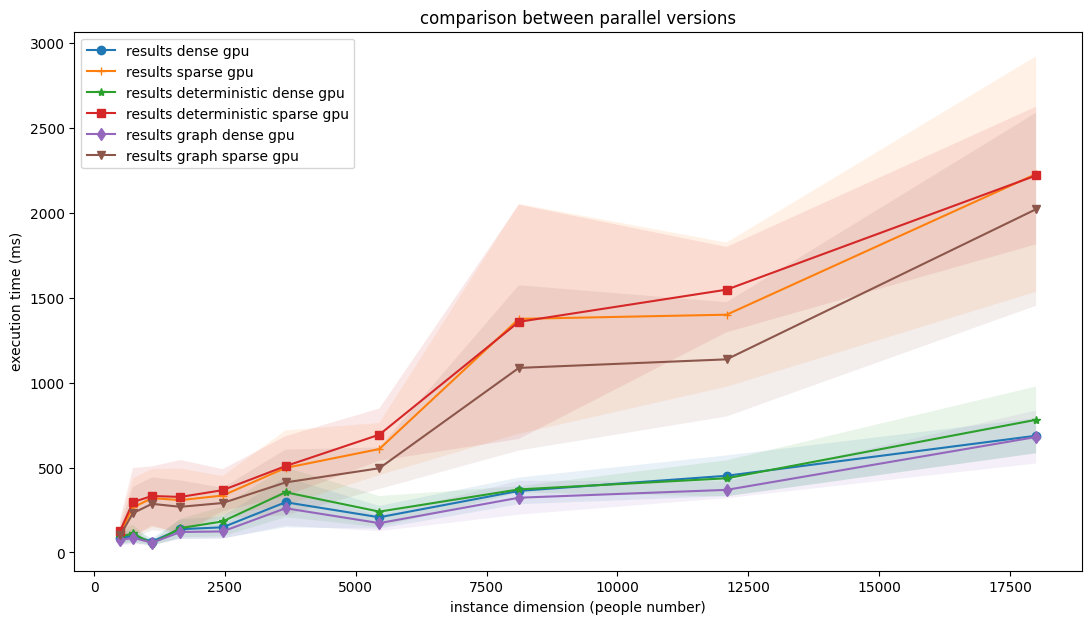

In [25]:
plt.figure()
markers = ['o','+','*','s','d','v','>','h']
j = 0
plt.title("comparison between parallel versions")
for case,data in data_dic.items():
    if case in filter_fn:
        directories = [el['directory'] for el in  data]
        for i in range(len(directories)): # dense and sparse
            person_number = [el['person_number'] for el in data[i]['directory_results']]
            obj_number = [el['obj_number'] for el in data[i]['directory_results']]
            gpu_mean_times = np.array( [el['group_values']['times']['gpu_time_mean'] for el in data[i]['directory_results']])
            gpu_sd_times = np.array( [el['group_values']['times']['gpu_time_sd'] for el in data[i]['directory_results']])
            cpu_mean_times = np.array( [el['group_values']['times']['cpu_time_mean'] for el in data[i]['directory_results']])
            cpu_sd_times = np.array( [el['group_values']['times']['cpu_time_sd'] for el in data[i]['directory_results']])
            plt.plot(person_number, gpu_mean_times, '-'+markers[j], label=' '.join(case.split('/')[-1].split('_')[1:]) + ' ' +directories[i].split('/')[1] + ' gpu')
            plt.fill_between(person_number,gpu_mean_times-gpu_sd_times,gpu_mean_times+gpu_sd_times,alpha=.1)
            #plt.plot(person_number, cpu_mean_times, label=case + ' ' +directories[i].split('/')[1] + ' cpu')
            #plt.fill_between(person_number,cpu_mean_times-cpu_sd_times,cpu_mean_times+cpu_sd_times,alpha=.1)
            plt.legend(loc="upper left")
            plt.xlabel("instance dimension (people number)")
            plt.ylabel("execution time (ms)")
            j+=1

In [57]:
result_small_eps_list[0]

,new_results_small_eps_gpu_mean_exec_time,new_results_small_eps_gpu_sd_exec_time,new_results_small_eps_mean_round_num,new_results_small_eps_sd_round_num,new_results_small_eps_cpu_mean_round_num,new_results_small_eps_cpu_sd_round_num
500,332.908310,170.337975,12983.266667,7189.663478,12974.000000,7424.210059
744,526.866009,284.187290,19938.933333,11491.306823,19108.333333,11107.576865
1108,256.913919,150.477077,8743.666667,5668.911557,8699.333333,5798.443777
1650,842.728365,137.653254,30853.533333,5291.652238,32172.333333,5270.223520
2458,2681.101603,796.019264,98341.800000,30987.042869,99424.000000,31197.756936
3660,14135.333008,7620.047285,497157.066667,288563.888505,502452.333333,292669.049457


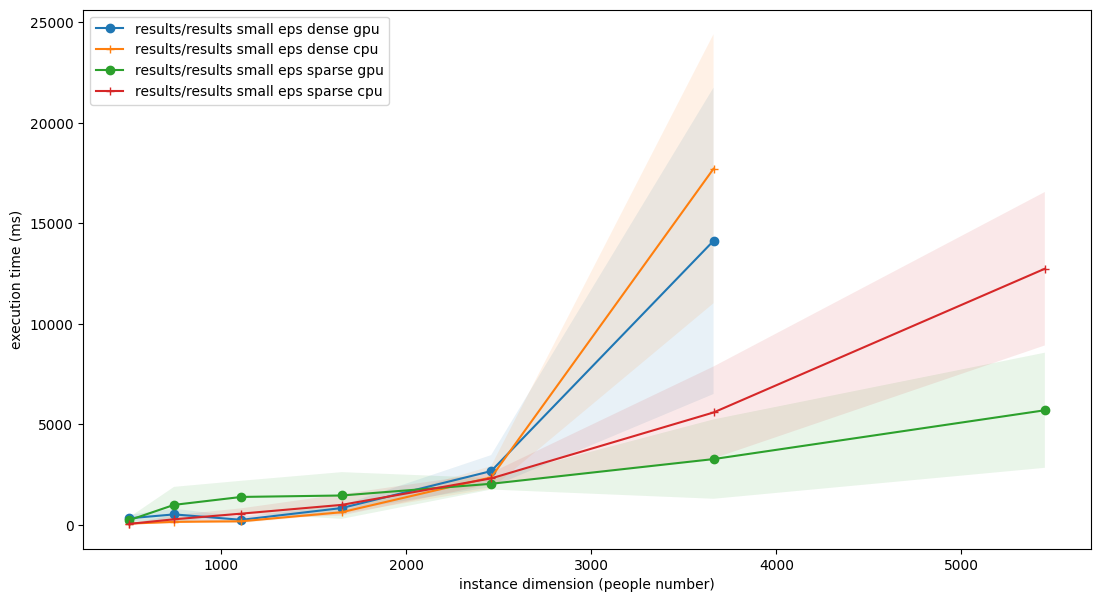

In [9]:
def filter_tiemout(el, arglist):
    if not (el['group_values']['output'].startswith('timeout')):
        output = el
        for arg in arglist:
            output = output[arg]
            
        return output
    return None

j=0
for case,data in data_dic.items():
    if case.endswith('eps'):
        directories = [el['directory'] for el in  data]
        plt.figure()
        result_small_eps_list = []
        for i in range(len(directories)): # dense and sparse
            results = pd.DataFrame()
            j = 0

            round_number = [extract_mean_round_num_from_group(out)['gpu'] for out in list(filter(None, [filter_tiemout(el,['group_values','partitioned_output','group_results']) for el in data[i]['directory_results']]))]
            cpu_round_number = [extract_mean_round_num_from_group(out)['cpu'] for out in list(filter(None, [filter_tiemout(el,['group_values','partitioned_output','group_results']) for el in data[i]['directory_results']]))]

    
            #print(data[i]['directory_results'][-1])
            obj_number = [el['obj_number'] for el in data[i]['directory_results']]
            gpu_mean_times = np.array( list(filter(None, [filter_tiemout(el,['group_values','times','gpu_time_mean']) for el in data[i]['directory_results']])))
            gpu_sd_times = np.array( list(filter(None, [filter_tiemout(el,['group_values','times','gpu_time_sd']) for el in data[i]['directory_results']])))
            cpu_mean_times = np.array(list(filter(None,  [filter_tiemout(el,['group_values','times','cpu_time_mean']) for el in data[i]['directory_results']])))
            cpu_sd_times = np.array(list(filter(None,  [filter_tiemout(el,['group_values','times','cpu_time_sd']) for el in data[i]['directory_results']])))
            person_number = [el['person_number'] for el in data[i]['directory_results']][:len(gpu_mean_times)]
            plt.plot(person_number, gpu_mean_times, '-'+markers[j], label=' '.join(case.split('_')[-3:]) + ' ' +directories[i].split('/')[1] + ' gpu')
            plt.fill_between(person_number,gpu_mean_times-gpu_sd_times,gpu_mean_times+gpu_sd_times,alpha=.1)
            j+=1
            plt.plot(person_number, cpu_mean_times, '-'+markers[j],label=' '.join(case.split('_')[-3:])+ ' ' +directories[i].split('/')[1] + ' cpu')
            plt.fill_between(person_number,cpu_mean_times-cpu_sd_times,cpu_mean_times+cpu_sd_times,alpha=.1)
            plt.xlabel("instance dimension (people number)")
            plt.ylabel("execution time (ms)")
            plt.legend(loc="upper left")
            j+=1

            results[case+'_gpu_mean_exec_time'] = gpu_mean_times
            results[case+'_gpu_sd_exec_time'] = gpu_sd_times
            results[case+'_mean_round_num'] = [el['mean'] for el in round_number]
            results[case+'_sd_round_num'] =  [el['sd'] for el in round_number]
            #if i == 0:
            results[case+'_cpu_mean_exec_time'] = cpu_mean_times
            results[case+'_cpu_sd_exec_time'] = cpu_sd_times
            results[case+'_cpu_mean_round_num'] = [el['mean'] for el in cpu_round_number]
            results[case+'_cpu_sd_round_num'] =  [el['sd'] for el in cpu_round_number]
            results.index = person_number
            result_small_eps_list.append(results)

In [29]:
def filter_tiemout(el, arglist):
    if not (el['group_values']['output'] == 'timeout'):
        output = el
        for arg in arglist:
            output = output[arg]
            
        return output
    return None

j=0
for case,data in data_dic.items():
    if case.endswith('rep'):
        directories = [el['directory'] for el in  data]
        for i in range(len(directories)): # dense and sparse
            plt.figure()
            #print(data[i]['directory_results'][-1])
            obj_number = [el['obj_number'] for el in data[i]['directory_results']]
            gpu_mean_times = np.array( list(filter(None, [filter_tiemout(el,['group_values','times','gpu_time_mean']) for el in data[i]['directory_results']])))
            gpu_sd_times = np.array( list(filter(None, [filter_tiemout(el,['group_values','times','gpu_time_sd']) for el in data[i]['directory_results']])))
            cpu_mean_times = np.array(list(filter(None,  [filter_tiemout(el,['group_values','times','cpu_time_mean']) for el in data[i]['directory_results']])))
            cpu_sd_times = np.array(list(filter(None,  [filter_tiemout(el,['group_values','times','cpu_time_sd']) for el in data[i]['directory_results']])))
            person_number = [el['person_number'] for el in data[i]['directory_results']][:len(gpu_mean_times)]
            plt.plot(person_number, gpu_mean_times, '-'+markers[j], label=case + ' ' +directories[i].split('/')[-1] + ' gpu')
            plt.fill_between(person_number,gpu_mean_times-gpu_sd_times,gpu_mean_times+gpu_sd_times,alpha=.1)
            j+=1
            plt.plot(person_number, cpu_mean_times, '-'+markers[j],label=case + ' ' +directories[i].split('/')[-1] + ' cpu')
            plt.fill_between(person_number,cpu_mean_times-cpu_sd_times,cpu_mean_times+cpu_sd_times,alpha=.1)
            plt.legend(loc="upper left")
            j+=1

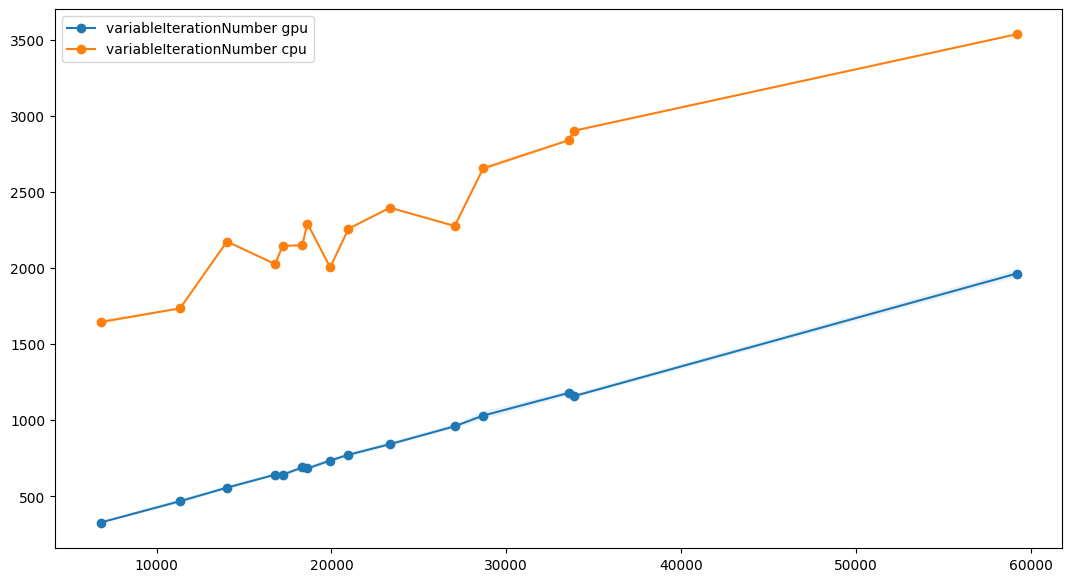

In [27]:
plt.figure()
j = 0
data = data_dic['results/results_variable_iter_num']
person_number = [el['person_number'] for el in data[0]['directory_results']]
obj_number = [el['obj_number'] for el in data[0]['directory_results']]
iter_num = [el['group_values']['partitioned_output']['group_results'][0]['iteration_res'][0]['auction_rounds'] for el in data[0]['directory_results']]
gpu_mean_times = np.array( [el['group_values']['times']['gpu_time_mean'] for el in data[0]['directory_results']])
gpu_sd_times = np.array( [el['group_values']['times']['gpu_time_sd'] for el in data[0]['directory_results']])
cpu_mean_times = np.array( [el['group_values']['times']['cpu_time_mean'] for el in data[0]['directory_results']])
cpu_sd_times = np.array( [el['group_values']['times']['cpu_time_sd'] for el in data[0]['directory_results']])
gpu_df = pd.DataFrame({"iter_num":iter_num, "gpu_mean_times":gpu_mean_times, "gpu_sd_times":gpu_sd_times})
gpu_df = gpu_df.sort_values('iter_num')
plt.plot(gpu_df['iter_num'], gpu_df['gpu_mean_times'], '-'+markers[j], label=data[0]['directory'].split('/')[1] + ' gpu')
plt.fill_between(gpu_df['iter_num'],gpu_df['gpu_mean_times']-gpu_df['gpu_sd_times'],gpu_df['gpu_mean_times']+gpu_df['gpu_sd_times'],alpha=.1)
cpu_df = pd.DataFrame({"iter_num":iter_num, "cpu_mean_times":cpu_mean_times, "cpu_sd_times":cpu_sd_times})
cpu_df = cpu_df.sort_values('iter_num')
plt.plot(cpu_df['iter_num'], cpu_df['cpu_mean_times'], '-'+markers[j], label=data[0]['directory'].split('/')[1] + ' cpu')
plt.fill_between(cpu_df['iter_num'],cpu_df['cpu_mean_times']-cpu_df['cpu_sd_times'],cpu_df['cpu_mean_times']+cpu_df['cpu_sd_times'],alpha=.1)
plt.legend(loc="upper left")
j+=1

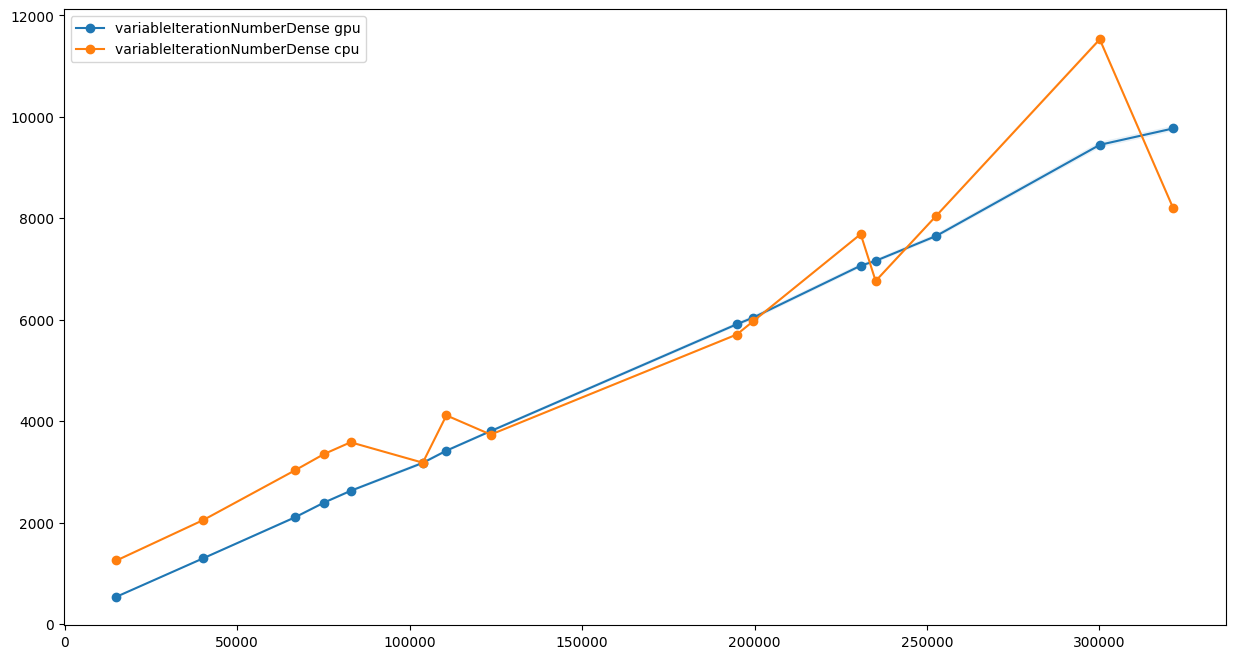

In [38]:
plt.figure()
j = 0
data = data_dic['results/results_variable_iter_num']
person_number = [el['person_number'] for el in data[0]['directory_results']]
obj_number = [el['obj_number'] for el in data[0]['directory_results']]
iter_num = [el['group_values']['partitioned_output']['group_results'][0]['iteration_res'][0]['auction_rounds'] for el in data[0]['directory_results']]
gpu_mean_times = np.array( [el['group_values']['times']['gpu_time_mean'] for el in data[0]['directory_results']])
gpu_sd_times = np.array( [el['group_values']['times']['gpu_time_sd'] for el in data[0]['directory_results']])
cpu_mean_times = np.array( [el['group_values']['times']['cpu_time_mean'] for el in data[0]['directory_results']])
cpu_sd_times = np.array( [el['group_values']['times']['cpu_time_sd'] for el in data[0]['directory_results']])
gpu_df = pd.DataFrame({"iter_num":iter_num, "gpu_mean_times":gpu_mean_times, "gpu_sd_times":gpu_sd_times})
gpu_df = gpu_df.sort_values('iter_num')
plt.plot(gpu_df['iter_num'], gpu_df['gpu_mean_times'], '-'+markers[j], label=data[0]['directory'].split('/')[1] + ' gpu')
plt.fill_between(gpu_df['iter_num'],gpu_df['gpu_mean_times']-gpu_df['gpu_sd_times'],gpu_df['gpu_mean_times']+gpu_df['gpu_sd_times'],alpha=.1)
cpu_df = pd.DataFrame({"iter_num":iter_num, "cpu_mean_times":cpu_mean_times, "cpu_sd_times":cpu_sd_times})
cpu_df = cpu_df.sort_values('iter_num')
plt.plot(cpu_df['iter_num'], cpu_df['cpu_mean_times'], '-'+markers[j], label=data[0]['directory'].split('/')[1] + ' cpu')
plt.fill_between(cpu_df['iter_num'],cpu_df['cpu_mean_times']-cpu_df['cpu_sd_times'],cpu_df['cpu_mean_times']+cpu_df['cpu_sd_times'],alpha=.1)
plt.legend(loc="upper left")
j+=1

Text(0, 0.5, 'number of active bidders')

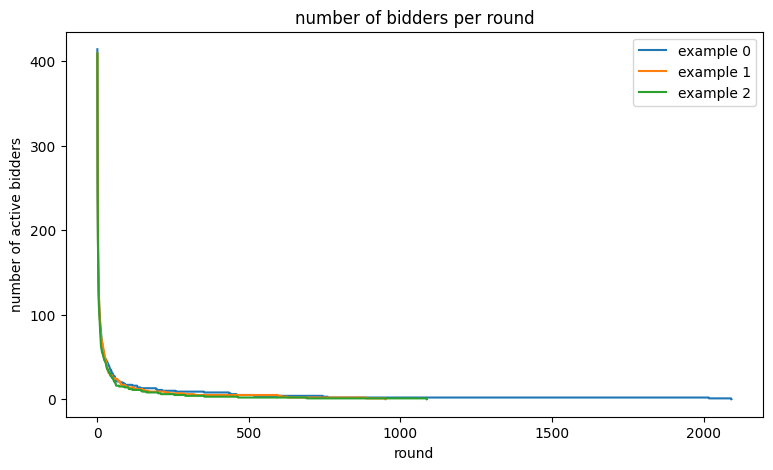

In [27]:
plt.rcParams["figure.figsize"] = (9,5)
fns = ['unmatched_log_1108_007.txt','unmatched_log_1108_008.txt','unmatched_log_1108_009.txt']
for i,fn in enumerate(fns):
    data = []
    with open(fn,'r') as f:
        for line in f:
            if line.startswith('unmatched'):
                data.append(int(line.split(' ')[1]))
    plt.plot(data, label='example '+str(i))
plt.legend(loc="upper right")
plt.title('number of bidders per round')
plt.xlabel('round')
plt.ylabel('number of active bidders')

Text(0, 0.5, 'number of bidders')

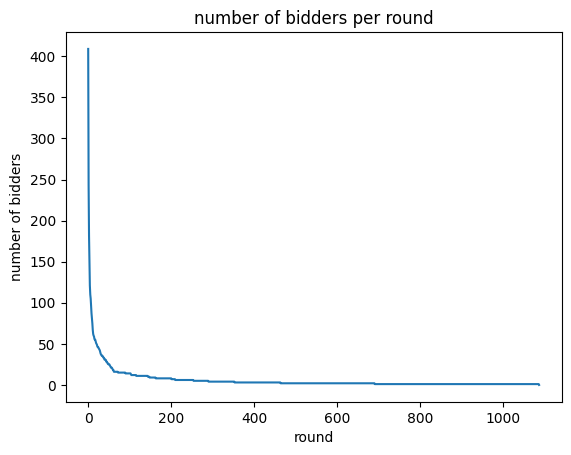

In [5]:
plt.plot(data)
plt.title('number of bidders per round')
plt.xlabel('round')
plt.ylabel('number of active bidders')

In [24]:
person_number = [el['person_number'] for el in data[0]['directory_results']]
obj_number = [el['obj_number'] for el in data[0]['directory_results']]
gpu_mean_times = [el['group_values']['times']['gpu_time_mean'] for el in data[0]['directory_results']]
gpu_sd_times = [el['group_values']['times']['gpu_time_sd'] for el in data[0]['directory_results']]
cpu_mean_times = [el['group_values']['times']['cpu_time_mean'] for el in data[0]['directory_results']]
cpu_sd_times = [el['group_values']['times']['cpu_time_sd'] for el in data[0]['directory_results']]

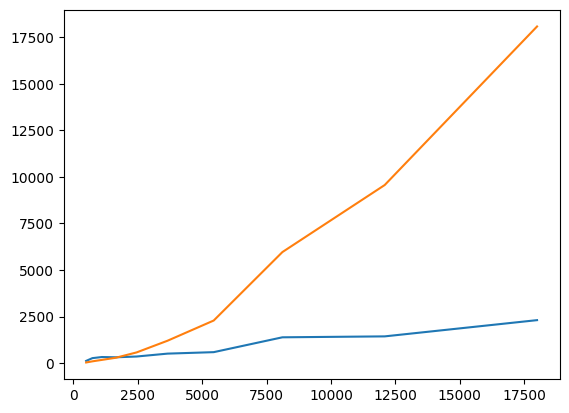

In [38]:
plt.plot(person_number, gpu_mean_times,person_number, cpu_mean_times)

In [15]:
data[0]['directory_results'][0]

{'person_number': 500,
 'obj_number': 500,
 'density': 1.0,
 'relative_files': ['testcases/dense/testcase_001_500_500_100.bin',
  'testcases/dense/testcase_002_500_500_100.bin',
  'testcases/dense/testcase_003_500_500_100.bin'],
 'group_values': {'times': {'gpu_time_mean': 85.094912,
   'cpu_time_mean': 20.780535,
   'gpu_time_sd': 36.49755,
   'cpu_time_sd': 5.215629},
  'partitioned_output': {'group_results': [{'filename': 'testcases/dense/testcase_001_500_500_100.bin',
     'iteration_res': [{'auction_rounds': 1958,
       'score': 4984187,
       'exec_time': 55.424801,
       'device': 'gpu'},
      {'auction_rounds': 1908,
       'score': 4984171,
       'exec_time': 16.55024,
       'device': 'cpu'},
      {'auction_rounds': 1908,
       'score': 4984171,
       'exec_time': 53.326271,
       'device': 'gpu'},
      {'auction_rounds': 1908,
       'score': 4984171,
       'exec_time': 16.878752,
       'device': 'cpu'},
      {'auction_rounds': 1829,
       'score': 4984182,
   